In [1]:
""" sklearn Library Exercise """
# 앞서 공부했던 GD, SGD 등의 알고리즘은 모두 sklearn 에 구현되어 있다.
# sklearn 홈페이지에 library 에 대한 설명이 나와있다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
""" [ 1. Linear Regression with Normal-Equation ] """
# Normal-Equation 으로 구현되어있는 sklearn 의 기본 모듈이다.
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = df.values
y = boston.target

In [7]:
# LinearRegression import
from sklearn.linear_model import LinearRegression

lr_ne = LinearRegression(fit_intercept=True)

In [8]:
# Training data, Test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

lr_ne.fit(X_train, y_train)

y_hat = lr_ne.predict(X_test)
y_true = y_test

In [9]:
# RMSE 추출
rmse = np.sqrt(np.sum((y_hat - y_true) ** 2) / len(y_true))
rmse

4.554903221837863

In [10]:
# MSE 추출
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.747143360308947

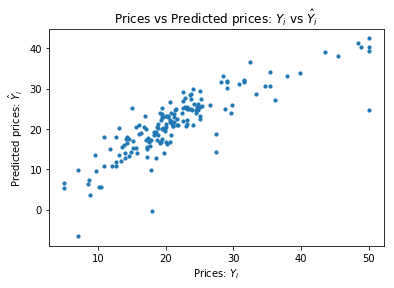

In [11]:
# matplotlib 로 시각화
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()

# 여기선 실제값과 예측값이 선형적인 관계로 잘 나타내어 진 것을 알 수 있다.

In [12]:
lr_ne.coef_

array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
       -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
        2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
       -5.48489997e-01])

In [13]:
""" [ 2. Linear Regression with SGD ] """
# SGD 를 이용한 Linear Regrssion 구하기
# 단점은, 사용자가 입력해 주어야 할 parameter 들이 많다는 것 ! (hyper-parameter)
# (입력할 parameter 는 홈페이지(contest.kakaocode.com/contest/view/321) 를 참조하도록 하자)

' [ 2. Linear Regression with SGD ] '

In [14]:
from sklearn.linear_model import SGDRegressor

lr_SGD = SGDRegressor()

In [15]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)  # 데이터 scale 과정

In [16]:
# == ( 1. scale 되지 않은 데이터를 넣을 떈 학습이 잘 되지 않는다 ! ) ==
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [17]:
lr_SGD.fit(X_train, y_train)  # fitting 과정

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [19]:
# MSE 및 RMSE 추출
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(np.sum((y_hat - y_true) ** 2) / len(y_true))

rmse, mse
# 여기선 rmse 가 굉장히 큰 값으로 추출됐는데, 
# 이는 학습이 잘 되지 않았다는 것을 의미한다.

# (SGD 를 사용할 땐, 기본적으로 학습 데이터를 평준화 시켜줘야 한다.
#  즉, 위 경우에선 scale 된 데이터를 넣지 않았기 때문에 제대로 학습이 되지 않은 것이다 !)

(559583400710822.5, 3.1313358235108896e+29)

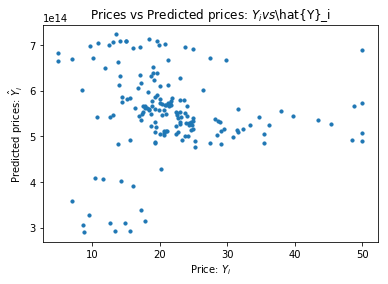

In [20]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Price: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i vs $\hat{Y}_i")

plt.show()

In [21]:
# == ( 2. scale 된 데이터를 넣어야 학습이 잘 된다 ! ) ==
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42
)

In [22]:
lr_SGD.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [23]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [24]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(np.sum((y_hat - y_true) ** 2) / len(y_true))

rmse, mse
# RMSE 값이 안정적으로 나오는 것을 확인 할 수 있다.

(4.795580538686354, 22.9975927030273)

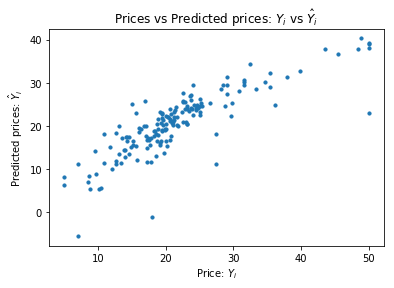

In [25]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Price: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()

In [26]:
# >> 왜 scale 된 데이터를 넣어야 하는가 ?
#   - 어떤 값은 굉장히 크고, 어떤 값은 작기 때문에 적당한 최적점을 찾기가 어렵다.
#   - 따라서 SGD 를 통해 LR 을 돌 때는 반드시 scale 을 해주어야 한다.

# >> 만약 scale 안 된 데이터를 넣고자 할 땐 ?
#   - 1. 굉장히 작은 값을 eta0(learning rate) 로 넣는다. (leaning_rate="constant" 를 넣는 것 잊지 않기. -> decay 시킴)
#   - 2. 반복 횟수(iteration) 을 늘린다.
#
#   >> 이는 딥러닝에서도 마찬가지이다.

In [27]:
""" [ 3. Linear Regression with Ridge(L2) & Lasso(L1) regression ] """
from sklearn.linear_model import Lasso, Ridge

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [29]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
# lasso = Lasso(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [31]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(np.sum((y_hat - y_true) ** 2) / len(y_true))

rmse, mse

(281.071557935282, 79001.22068016657)

In [32]:
# ??? 왜 이렇게 크게 나올까 ?
# 일단 L1, L2 는 깊이 들어가지 않았으므로 다음 강의로 넘어간다.